# Clean and Analyze Employee Exit Surveys

In this project, we'll clean and analyze exit surveys from employees of the [Department of Education, Training and Employment (DETE)](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) and the Technical and Further Education (TAFE) body of the Queensland government in Australia. The TAFE exit survey can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

We'll pretend our stakeholders want us to combine the results for **both** surveys to answer the following question:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

# Introduction
First, we'll read in the datasets and do some initial exporation.


In [37]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#Read in the data
dete_survey = pd.read_csv('dete_survey.csv')

#Quick exploration of the data
pd.options.display.max_columns = 150 # in order to avoid truncated output
dete_survey.head()

ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   
3   4         Resignation-Other reasons    05/2012            2005   
4   5                    Age Retirement    05/2012            1970   

  Role Start Date                                      Position  \
0            2004                                Public Servant   
1      Not Stated                                Public Servant   
2            2011                               Schools Officer   
3            2006                                       Teacher   
4            1989  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Central Office  Corporate Strategy and Peformance   
2            NaN      Central Office               Education Queensland   
3        Primary  Central Queensland                                NaN   
4            NaN          South East                                NaN   

     Employment Status  Career move to public sector  \
0  Permanent Full-time                          True   
1  Permanent Full-time                         False   
2  Permanent Full-time                         False   
3  Permanent Full-time                         False   
4  Permanent Full-time                         False   

   Career move to private sector  Interpersonal conflicts  \
0                          False                    False   
1                          False                    False   
2                          False                    False   
3                           True                    False   
4                          False                    False   

   Job dissatisfaction  Dissatisfaction with the department  \
0                 True                                False   
1                False                                False   
2                False                                False   
3                False                                False   
4                False                                False   

   Physical work environment  Lack of recognition  Lack of job security  \
0                      False                 True                 False   
1                      False                False                 False   
2                      False                False                 False   
3                      False                False                 False   
4                      False                False                 False   

   Work location  Employment conditions  Maternity/family  Relocation  \
0          False                  False             False       False   
1          False                  False             False       False   
2          False                  False             False       False   
3          False                  False             False       False   
4          False                  False             False       False   

   Study/Travel  Ill Health  Traumatic incident  Work life balance  Workload  \
0         False       False               False              False     False   
1         False       False               False              False     False   
2         False       False               False              False     False   
3         False       False               False              False     False   
4         False       False               False               True     False   

   None of the above Professional Development Opportunities for promotion  \
0               True                        A                           A   
1              False                        A                           A   
2               True                       

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [3]:
dete_survey.describe(include='all')

ID  SeparationType Cease Date DETE Start Date Role Start Date  \
count   822.000000             822        822             822             822   
unique         NaN               9         25              51              46   
top            NaN  Age Retirement       2012      Not Stated      Not Stated   
freq           NaN             285        344              73              98   
mean    411.693431             NaN        NaN             NaN             NaN   
std     237.705820             NaN        NaN             NaN             NaN   
min       1.000000             NaN        NaN             NaN             NaN   
25%     206.250000             NaN        NaN             NaN             NaN   
50%     411.500000             NaN        NaN             NaN             NaN   
75%     616.750000             NaN        NaN             NaN             NaN   
max     823.000000             NaN        NaN             NaN             NaN   

       Position Classification        Region         Business Unit  \
count       817            455           822                   126   
unique       15              8             9                    14   
top     Teacher        Primary  Metropolitan  Education Queensland   
freq        324            161           135                    54   
mean        NaN            NaN           NaN                   NaN   
std         NaN            NaN           NaN                   NaN   
min         NaN            NaN           NaN                   NaN   
25%         NaN            NaN           NaN                   NaN   
50%         NaN            NaN           NaN                   NaN   
75%         NaN            NaN           NaN                   NaN   
max         NaN            NaN           NaN                   NaN   

          Employment Status Career move to public sector  \
count                   817                          822   
unique                    5                            2   
top     Permanent Full-time                        False   
freq                    434                          800   
mean                    NaN                          NaN   
std                     NaN                          NaN   
min                     NaN                          NaN   
25%                     NaN                          NaN   
50%                     NaN                          NaN   
75%                     NaN                          NaN   
max                     NaN                          NaN   

       Career move to private sector Interpersonal conflicts  \
count                            822                     822   
unique                             2                       2   
top                            False                   False   
freq                             742                     788   
mean                             NaN                     NaN   
std                              NaN                     NaN   
min                              NaN                     NaN   
25%                              NaN                     NaN   
50%                              NaN                     NaN   
75%                              NaN                     NaN   
max                              NaN                     NaN   

       Job dissatisfaction Dissatisfaction with the department  \
count                  822                                 822   
unique                   2                                   2   
top                  False                               False   
freq                   733                                 761   
mean                   NaN                                 NaN   
std                    NaN                                 NaN   
min                    NaN                                 NaN   
25%                    NaN                                 NaN   
50%                    NaN                                 NaN   
75%                    NaN                          

In [4]:
#Read in the data
tafe_survey = pd.read_csv("tafe_survey.csv")

#Quick exploration of the data
tafe_survey.head()

Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                       Career Move - Private Sector    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                                    NaN   
1                                -                                      -   
2                                -                                      -   
3                                -                                      -   
4                                -                                      -   

  Contributing Factors. Dissatisfaction  \
0                                   NaN   
1                                     -   
2                                     -   
3                                     -   
4                                     -   

  Contributing Factors. Job Dissatisfaction  \
0                                       NaN   
1                                         -   
2                                         -   
3                                         -   
4                                         -   

  Contributing Factors. Interpersonal Conflict Contributing Factors. Study  \
0                                          NaN                         NaN   
1                                            -                           -   
2                                            -                           -   
3                                            -                           -   
4                                            -                           -   

  Contributing Factors. Travel Contributing Factors. Other  \
0                          NaN                         NaN   
1                       Travel                           -   
2                            -                           -   
3                       Travel                           -   
4                            -                           -   

  Contributing Factors. NONE  \
0                        NaN   
1                          -   
2                       NONE   
3                          -   
4                          -   

  Main Factor. Which of these was the main factor for leaving?  \
0                                                NaN             

In [5]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [6]:
tafe_survey.describe(include='all')

Record ID                         Institute  \
count   7.020000e+02                               702   
unique           NaN                                12   
top              NaN  Brisbane North Institute of TAFE   
freq             NaN                               161   
mean    6.346026e+17                               NaN   
std     2.515071e+14                               NaN   
min     6.341330e+17                               NaN   
25%     6.343954e+17                               NaN   
50%     6.345835e+17                               NaN   
75%     6.348005e+17                               NaN   
max     6.350730e+17                               NaN   

                        WorkArea  CESSATION YEAR  \
count                        702      695.000000   
unique                         2             NaN   
top     Non-Delivery (corporate)             NaN   
freq                         432             NaN   
mean                         NaN     2011.423022   
std                          NaN        0.905977   
min                          NaN     2009.000000   
25%                          NaN     2011.000000   
50%                          NaN     2011.000000   
75%                          NaN     2012.000000   
max                          NaN     2013.000000   

       Reason for ceasing employment  \
count                            701   
unique                             6   
top                      Resignation   
freq                             340   
mean                             NaN   
std                              NaN   
min                              NaN   
25%                              NaN   
50%                              NaN   
75%                              NaN   
max                              NaN   

       Contributing Factors. Career Move - Public Sector   \
count                                                 437   
unique                                                  2   
top                                                     -   
freq                                                  375   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

       Contributing Factors. Career Move - Private Sector   \
count                                                 437    
unique                                                  2    
top                                                     -    
freq                                                  336    
mean                                                  NaN    
std                                                   NaN    
min                                                   NaN    
25%                                                   NaN    
50%                                                   NaN    
75%                                                   NaN    
max                                                   NaN    

       Contributing Factors. Career Move - Self-employment  \
count                                                 437    
unique                                                  2    
top                                                     -    
freq                                                  420    
mean                                                  NaN    
std                                                   NaN    
min                                                   NaN    
25%                                                   NaN    
50%                                                   NaN    
75%                                                   NaN    
max                                             

We can make the following observations based on the work above:

- The `dete_survey` dataframe contains `'Not Stated'` values that indicate values are missing, but they aren't represented as `NaN`.
- Both the `dete_survey` and `tafe_survey` contain many columns that we don't - need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

# Identify Missing Values and Drop Unneccessary Columns
First, we'll correct the `Not Stated` values and drop some of the columns we don't need for our analysis.

In [7]:
#Read in the data again, but this time read 'Not Stated' values as 'NaN'
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

#Quick exploration of the data
dete_survey.head()

ID                    SeparationType Cease Date  DETE Start Date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   Role Start Date                                      Position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Central Office  Corporate Strategy and Peformance   
2            NaN      Central Office               Education Queensland   
3        Primary  Central Queensland                                NaN   
4            NaN          South East                                NaN   

     Employment Status  Career move to public sector  \
0  Permanent Full-time                          True   
1  Permanent Full-time                         False   
2  Permanent Full-time                         False   
3  Permanent Full-time                         False   
4  Permanent Full-time                         False   

   Career move to private sector  Interpersonal conflicts  \
0                          False                    False   
1                          False                    False   
2                          False                    False   
3                           True                    False   
4                          False                    False   

   Job dissatisfaction  Dissatisfaction with the department  \
0                 True                                False   
1                False                                False   
2                False                                False   
3                False                                False   
4                False                                False   

   Physical work environment  Lack of recognition  Lack of job security  \
0                      False                 True                 False   
1                      False                False                 False   
2                      False                False                 False   
3                      False                False                 False   
4                      False                False                 False   

   Work location  Employment conditions  Maternity/family  Relocation  \
0          False                  False             False       False   
1          False                  False             False       False   
2          False                  False             False       False   
3          False                  False             False       False   
4          False                  False             False       False   

   Study/Travel  Ill Health  Traumatic incident  Work life balance  Workload  \
0         False       False               False              False     False   
1         False       False               False              False     False   
2         False       False               False              False     False   
3         False       False               False              False     False   
4         False       False               False               True     False   

   None of the above Professional Development Opportunities for promotion  \
0               True                        A                           A   
1              False                        A                           A   
2               True           

In [8]:
# Remove columns we don't need for our analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

# Check that the columns were dropped
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

In [9]:
# Clean the column names
dete_survey_updated.columns = (dete_survey_updated.columns
                               .str.lower()
                               .str.strip()
                               .str.replace(' ', '_'))

# Check that the column names were updated correctly
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [10]:
# Update column names to match the names in dete_survey_updated
mapping = {'Record ID': 'id',
        'CESSATION YEAR': 'cease_date',
        'Reason for ceasing employment': 'separationtype',
        'Gender. What is your Gender?': 'gender',
        'CurrentAge. Current Age': 'age',
        'Employment Type. Employment Type': 'employment_status',
        'Classification. Classification': 'position',
        'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
        'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
       }
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis=1)

# Check that the specified column names were updated correcly
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

# Filter the Data
For this project, we'll only analyze survey respondents who *resigned*, so we'll only select separation types containing the string `'Resignation'`.

In [11]:
# Check the unique values in the separationtype column
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [12]:
# Check the unique values in the separationtype column
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [13]:
# Update all separation types containing the word "resignation" to "Resignation"
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

# Check the values in the separationtype column were updated correctly
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [14]:
# Select only the resignation separation types from each dataframe
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In [15]:
dete_resignations

id separationtype cease_date  dete_start_date  role_start_date  \
3      4    Resignation    05/2012           2005.0           2006.0   
5      6    Resignation    05/2012           1994.0           1997.0   
8      9    Resignation    07/2012           2009.0           2009.0   
9     10    Resignation       2012           1997.0           2008.0   
11    12    Resignation       2012           2009.0           2009.0   
..   ...            ...        ...              ...              ...   
808  810    Resignation    12/2013           2010.0           2010.0   
815  817    Resignation    01/2014           2012.0           2012.0   
816  818    Resignation    01/2014           2012.0           2012.0   
819  821    Resignation    01/2014           2009.0           2009.0   
821  823    Resignation    12/2013              NaN              NaN   

             position classification                region  \
3             Teacher        Primary    Central Queensland   
5    Guidance Officer            NaN        Central Office   
8             Teacher      Secondary      North Queensland   
9        Teacher Aide            NaN                   NaN   
11            Teacher      Secondary  Far North Queensland   
..                ...            ...                   ...   
808      Teacher Aide            NaN                   NaN   
815           Teacher        Primary  Far North Queensland   
816           Teacher      Secondary           North Coast   
819    Public Servant        A01-A04        Central Office   
821      Teacher Aide            NaN          Metropolitan   

            business_unit    employment_status  career_move_to_public_sector  \
3                     NaN  Permanent Full-time                         False   
5    Education Queensland  Permanent Full-time                         False   
8                     NaN  Permanent Full-time                         False   
9                     NaN  Permanent Part-time                         False   
11                    NaN  Permanent Full-time                         False   
..                    ...                  ...                           ...   
808                   NaN  Permanent Part-time                         False   
815                   NaN  Permanent Full-time                         False   
816                   NaN  Permanent Full-time                         False   
819  Education Queensland  Permanent Full-time                         False   
821                   NaN                  NaN                         False   

     career_move_to_private_sector  interpersonal_conflicts  \
3                             True                    False   
5                             True                    False   
8                             True                    False   
9                            False                     True   
11                           False                    False   
..                             ...                      ...   
808                          False                    False   
815                           True                    False   
816                          False                    False   
819                          False                    False   
821                          False                    False   

     job_dissatisfaction  dissatisfaction_with_the_department  \
3                  False                                False   
5                  False                                False   
8                  False                                False   
9                   True                                 True   
11                 False                                False   
..                   ...                                  ...   
808                False                                False   
815                False                                False   
816                False                                False   
819                False    

# Verify the Data

Below, we clean and explore the `cease_date` and `dete_start_date `columns to make sure all of the years make sense. We'll use the following criteria:

- Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.


In [16]:
# Check the unique values
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
07/2012      1
2010         1
09/2010      1
Name: cease_date, dtype: int64

In [17]:
# Extract the years and conver them to a float type
dete_resignations['cease_date'] = (dete_resignations['cease_date']
                                   .str.split('/').str[-1]
                                   .astype('float'))

# Check the values again and look for outliers
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [18]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

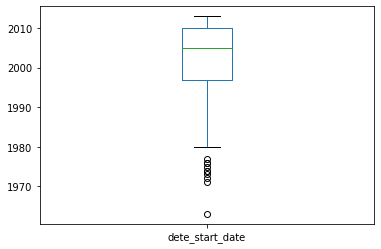

In [19]:
dete_resignations['dete_start_date'].plot(kind='box')

In [20]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

Below are our findings:

-The years in both dataframes don't completely align. The `tafe_survey_updated` dataframe contains some cease dates in 2009, but the `dete_survey_updated` dataframe does not. The `tafe_survey_updated `dataframe also contains many more cease dates in 2010 than the `dete_survey_updaed` dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as is.


# Create a New Column
Since our end goal is to answer the question below, we need a column containing the length of time an employee spent in their workplace, or years of service, in both dataframes.

- End goal: Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

The `tafe_resignations` dataframe already contains a "service" column, which we renamed to `institute_service`.

Below, we calculate the years of service in the `dete_survey_updated` dataframe by subtracting the `dete_start_date` from the `cease_date` and create a new column named `institute_service`.

In [21]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

# Identify Dissatisfied Employees
Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

1. tafe_survey_updated:
    - Contributing Factors. Dissatisfaction
    - Contributing Factors. Job Dissatisfaction
2. dafe_survey_updated:
    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - physical_work_environment
    - lack_of_recognition
    - lack_of_job_security
    - work_location
    - employment_conditions
    - work_life_balance
    - workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as `dissatisfied` in a new column. After our changes, the new `dissatisfied` column will contain just the following values:

- `True`: indicates a person resigned because they were dissatisfied in some way
- `False`: indicates a person resigned because of a reason other than dissatisfaction with the job
- `NaN`: indicates the value is missing

In [22]:
# Check the unique values
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [23]:
# Check the unique values
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()


-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [24]:
# Update the values in the contributing factors columns to be either True, False, or NaN
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
    
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)


False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [25]:
cols = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload',]

dete_resignations['dissatisfied'] = dete_resignations[cols].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()

# Check the unique values after the updates
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

# Combining the Data
Below, we'll add an institute column so that we can differentiate the data from each survey after we combine them. Then, we'll combine the dataframes and drop any remaining columns we don't need.

In [26]:
# Add an institute column
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [29]:
# Combine the datafeames
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True, sort=True)

# Drop columns with less than 500 non-null values
combined_updated = combined.dropna(thresh = 500, axis=1).copy()
combined_updated

age  cease_date dissatisfied    employment_status  gender  \
0     36-40      2012.0        False  Permanent Full-time  Female   
1     41-45      2012.0         True  Permanent Full-time  Female   
2     31-35      2012.0        False  Permanent Full-time  Female   
3     46-50      2012.0         True  Permanent Part-time  Female   
4     31-35      2012.0        False  Permanent Full-time    Male   
..      ...         ...          ...                  ...     ...   
646  21  25      2013.0        False  Temporary Full-time    Male   
647   51-55      2013.0        False  Temporary Full-time    Male   
648     NaN      2013.0        False                  NaN     NaN   
649   51-55      2013.0        False  Permanent Full-time  Female   
650  26  30      2013.0        False      Contract/casual  Female   

               id institute institute_service                 position  \
0    4.000000e+00      DETE                 7                  Teacher   
1    6.000000e+00      DETE                18         Guidance Officer   
2    9.000000e+00      DETE                 3                  Teacher   
3    1.000000e+01      DETE                15             Teacher Aide   
4    1.200000e+01      DETE                 3                  Teacher   
..            ...       ...               ...                      ...   
646  6.350660e+17      TAFE               5-6         Operational (OO)   
647  6.350668e+17      TAFE               1-2  Teacher (including LVT)   
648  6.350677e+17      TAFE               NaN                      NaN   
649  6.350704e+17      TAFE               5-6  Teacher (including LVT)   
650  6.350730e+17      TAFE               3-4      Administration (AO)   

    separationtype  
0      Resignation  
1      Resignation  
2      Resignation  
3      Resignation  
4      Resignation  
..             ...  
646    Resignation  
647    Resignation  
648    Resignation  
649    Resignation  
650    Resignation  

[651 rows x 10 columns]

# Clean the Service Column
Next, we'll clean the `institute_service` column and categorize employees according to the following definitions:

- New: Less than 3 years in the workplace
- Experienced: 3-6 years in the workplace
- Established: 7-10 years in the workplace
- Veteran: 11 or more years in the workplace

Our analysis is based on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

In [30]:
# Check the unique values
combined_updated['institute_service'].value_counts(dropna=False)


NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
10.0                   6
14.0                   6
18.0                   5
16.0                   5
23.0                   4
24.0                   4
11.0                   4
39.0                   3
21.0                   3
32.0                   3
19.0                   3
36.0                   2
30.0                   2
26.0                   2
28.0                   2
25.0                   2


In [31]:
combined_updated['institute_service'] = (combined_updated['institute_service']
                                         .astype('str')
                                         .str.extract(r'(\d+)')
                                         .astype('float'))
# Check the years extracted are correct
combined_updated['institute_service'].value_counts(dropna=False)


1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [34]:
# Convert years of service to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"

combined_updated['service_cat'] = combined_updated['institute_service'].apply(transform_service)

# Quick chack of the update
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

# Perform Some Initial Analysis
Finally, we'll replace the missing values in the `dissatisfied` column with the most frequent value, `False`. Then, we'll calculate the percentage of employees who resigned due to dissatisfaction in each `service_cat` group and plot the results.

Note that since we still have additional missing values left to deal with, this is meant to be an initial introduction to the analysis, *not* the final analysis.

In [35]:
# Verify unique values
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [36]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

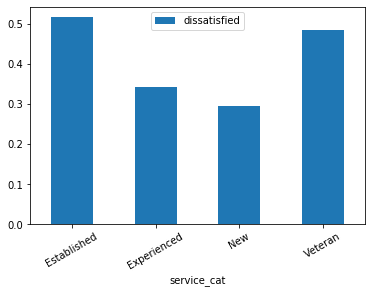

In [40]:
# Calculate the percentage of employees who resigned due tp dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Plot the results
dis_pct.plot(kind='bar', rot=30)

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.

In this guided project, we experienced that in order to extract any meaningful insights from our data, we had to perform many data cleaning tasks. In order to create one visualization (and not even the final one), we completed the following tasks:

- Explored the data and figured out how to prepare it for analysis
- Corrected some of the missing values
- Dropped any data not needed for our analysis
- Renamed our columns
- Verified the quality of our data
- Created a new `institute_service` column
- Cleaned the `Contributing Factors` columns
- Created a new column indicating if an employee resigned because they were dissatisfied in some way
- Combined the data
- Cleaned the `institute_service` column
- Handled the missing values in the `dissatisfied` column
- Aggregated the data

Our work here is far from done! We recommend that you continue with the following steps:

- Decide how to handle the rest of the missing values. Then, aggregate the data according to the `service_cat` column again. How many people in each career stage resigned due to some kind of dissatisfaction?
- Clean the `age` column. How many people in each age group resgined due to some kind of dissatisfaction?
- Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?
- Format your project using Dataquest's [project style guide.](https://www.dataquest.io/blog/data-science-project-style-guide/)